<a href="https://colab.research.google.com/github/gokul-gj/Business-Case-Retail-Chain/blob/master/business_case_retail_chain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement**

Analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

Understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

In [ ]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category               int64
Purchase                       int64
dtype: object

In [ ]:
#finding percentage of missing value
df.isna().sum()/len(df)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

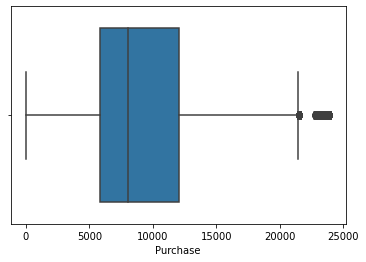

In [ ]:
sns.boxplot(data=df,x="Purchase")

In [ ]:
q1 = df["Purchase"].quantile(0.25)
q3 = df["Purchase"].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit  = q1-1.5*iqr
high_limit = q3+1.5*iqr

In [ ]:
len(df[(df["Purchase"]<low_limit) | ( df["Purchase"]>high_limit)])

2677

In [ ]:
# calculating percetage of outliers in the total data set

len(df[(df["Purchase"]<low_limit) | ( df["Purchase"]>high_limit)])/len(df)*100

# Since this value is less than 3%, these outliers can be removed

0.4866671029763593

In [ ]:
# removing outliers from the dataset
df=df[(df["Purchase"]>=low_limit) & ( df["Purchase"]<=high_limit)]

In [ ]:
# rechecking the shape after removing outliers
df.shape

(547391, 10)

In [ ]:
# Converting UserID, Occupation and Product Category to Categorical data type
df["User_ID"] = df["User_ID"].astype("category")
df["Occupation"] = df["Occupation"].astype("category")
df["Product_Category"] = df["Product_Category"].astype("category")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.describe()
# Purchase per transcation: 9195.6

,Marital_Status,Purchase
count,547391.000000,547391.000000
mean,0.409486,9195.627195
std,0.491739,4938.872953
min,0.000000,12.000000
25%,0.000000,5721.000000
50%,0.000000,8038.000000
75%,1.000000,12019.000000
max,1.000000,21399.000000


In [ ]:
df["Purchase"].mean()

9195.62719518589

In [ ]:
#Mean purchase of male
df.loc[df["Gender"]=="M",'Purchase'].mean()

9367.724354697444

In [ ]:
#Mean purchase of female
df.loc[df["Gender"]=="F",'Purchase'].mean()

8671.049038603756

In [ ]:
#Stardard Deviation of male 
df.loc[df["Gender"]=="M",'Purchase'].std()

5009.234087946682

In [ ]:
#Stardard Deviation of femlale
df.loc[df["Gender"]=="F",'Purchase'].std()

4679.058483084379

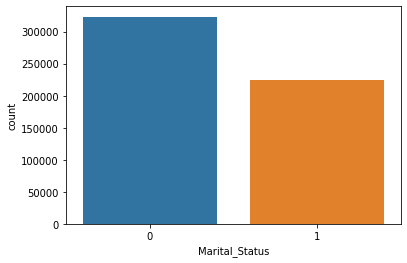

In [ ]:
sns.countplot(data=df,x="Marital_Status")
#Number of transaction made by unmarried people are more than married people

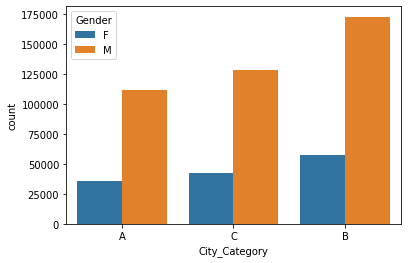

In [ ]:
sns.countplot(data=df,x="City_Category",hue="Gender")
# Thoughout all the cities Male make more transation than female.
# City B has the most no. of transation for all the cities.

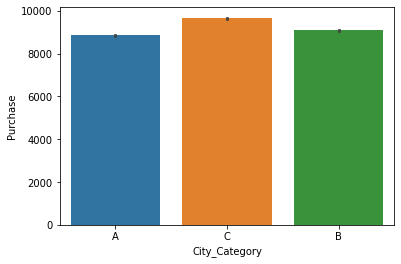

In [ ]:
sns.barplot(data=df,x='City_Category',y="Purchase",estimator=np.mean)
# The mean purchase per each transation is more or less the same from each city with C having the highest.
# Even though peoplr in city B make more transation the averge purchase value is lower than C

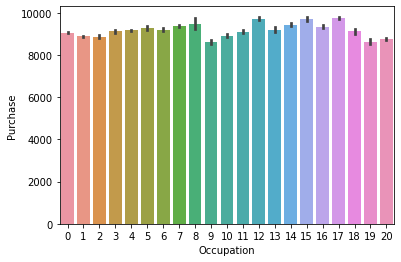

In [ ]:
sns.barplot(data=df,x='Occupation',y="Purchase",estimator=np.mean)
# Average purchase of each occupation almost remains the same with 8,12, 15 and 17 having the highest.

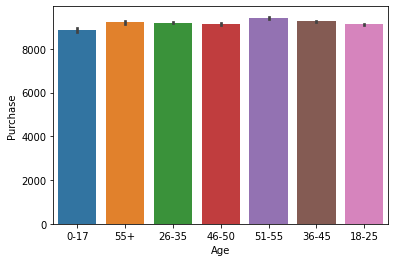

In [ ]:
sns.barplot(data=df,x='Age',y="Purchase",estimator=np.mean)
# Mean purchase of 0-17 is the least. Highest is for 51-55 age group

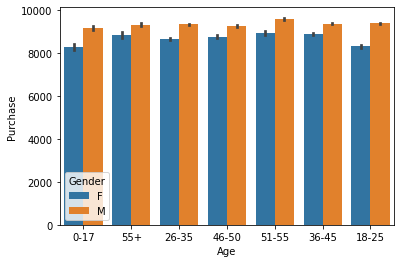

In [ ]:
sns.barplot(data=df,x='Age',y="Purchase",estimator=np.mean,hue="Gender")
# In every age group male make more purchase than female. This gap is significate in age group 18-25

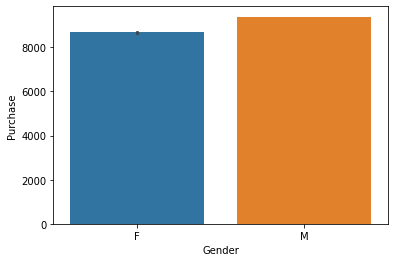

In [ ]:
sns.barplot(data=df,x='Gender',y="Purchase",estimator=np.mean)
# Male customers on an average make more purachase than female

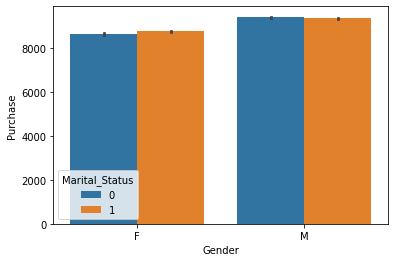

In [ ]:
sns.barplot(data=df,x='Gender',y="Purchase",estimator=np.mean,hue="Marital_Status")
# Married or single man and women make on a average same amount of purchase.

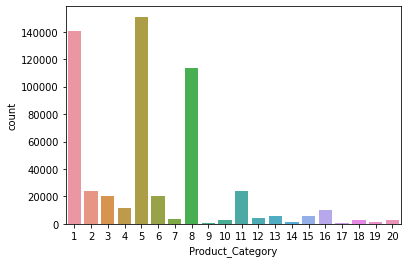

In [ ]:
sns.countplot(data=df,x="Product_Category")
# Prouct 1,5 and 8 have the highest demand in the market.

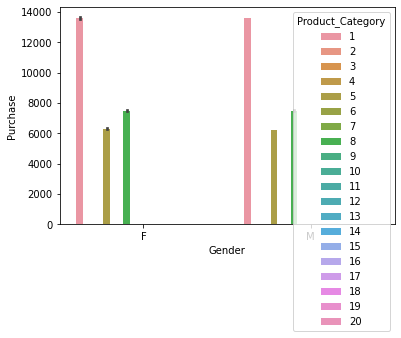

In [ ]:
df_Product_category=df[(df["Product_Category"]==1) |(df["Product_Category"]==5)|(df["Product_Category"]==8)]
sns.barplot(data=df_Product_category,x='Gender',y="Purchase",hue="Product_Category",estimator=np.mean)
# Prouct 1,5 and 8 are purchased by man and woman in the same amount. 

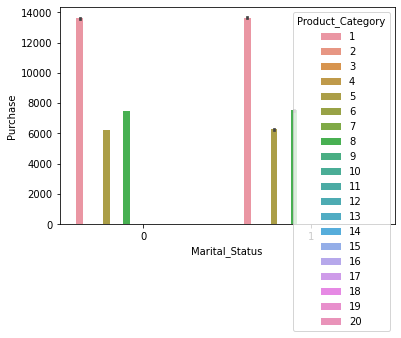

In [ ]:
sns.barplot(data=df_Product_category,x='Marital_Status',y="Purchase",hue="Product_Category",estimator=np.mean)
# Prouct 1,5 and 8 are purchased by married and unmarried customers in the same amount. So, these might be common house hold goods

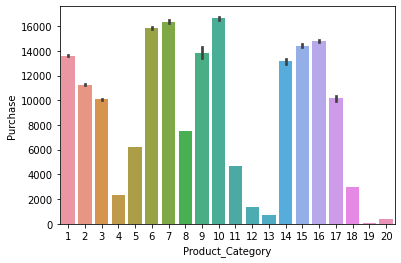

In [ ]:
sns.barplot(data=df,x='Product_Category',y="Purchase")
# Even though 6,7 and 10 quantity sold is less, but the purchase amount is large

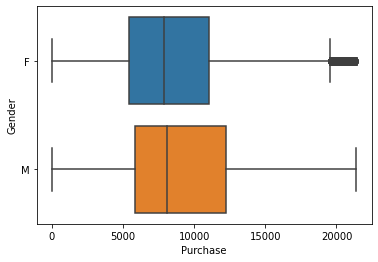

In [ ]:
sns.boxplot(data=df,x="Purchase",y="Gender")
# Male customers make bigger purchases than female. 

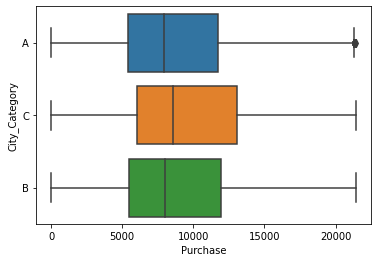

In [ ]:
sns.boxplot(data=df,x="Purchase",y="City_Category")
# People in city C make bigger purchases than other cities. 

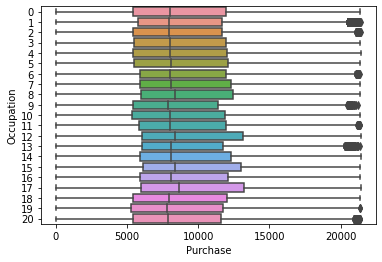

In [ ]:
df['Occupation'] = pd.Categorical(df.Occupation)
sns.boxplot(data=df,x="Purchase",y="Occupation")

In [ ]:
df_10=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")

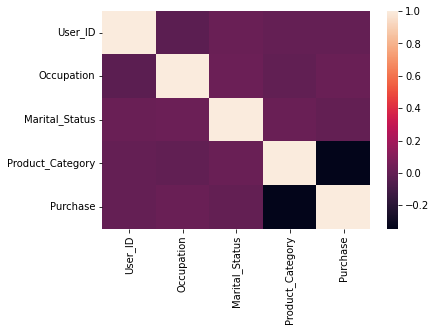

In [ ]:
sns.heatmap(df_10.corr())
# Product catergory and purchase are highly corrulated

In [ ]:
df['Marital_Status'] = pd.Categorical(df.Marital_Status)
df['Product_Category'] = pd.Categorical(df.Product_Category)
df['User_ID'] = pd.Categorical(df.User_ID)
df['Product_ID'] = pd.Categorical(df.Product_ID)

In [ ]:
df_Male=df[df["Gender"]=="M"]
df_Female=df[df["Gender"]=="F"]

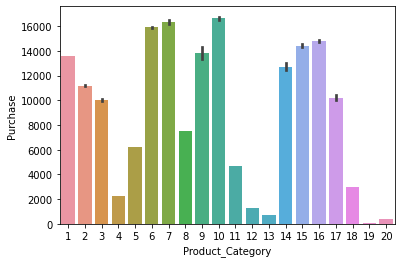

In [ ]:
sns.barplot(data=df_Male,x='Product_Category',y="Purchase")

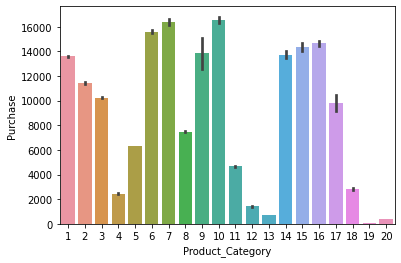

In [ ]:
sns.barplot(data=df_Female,x='Product_Category',y="Purchase")
# Amount of money spent by male and female in each product catergory same

9367.724354697444
21399 12


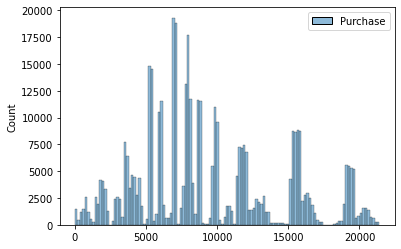

In [ ]:
sns.histplot(df_Male)
print(df_Male["Purchase"].mean())
print(df_Male["Purchase"].max(),df_Male["Purchase"].min())

8671.049038603756
21398 12


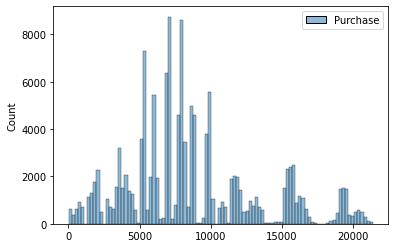

In [ ]:
sns.histplot(df_Female)
print(df_Female["Purchase"].mean())
print(df_Female["Purchase"].max(),df_Female["Purchase"].min())
#The distribution is right-skewed and does not resemblem a gaussin distribution.

5000


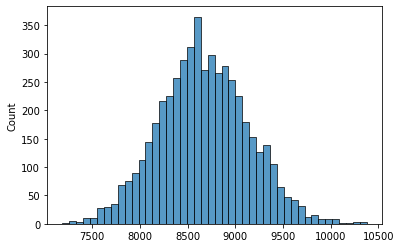

In [ ]:
#Bootdtraping
num_samples=100
collect_sample_means_Female=[]
for i in range(5000):
  sample_mean=df_Female["Purchase"].sample(num_samples).mean()
  collect_sample_means_Female.append(sample_mean)
sns.histplot(collect_sample_means_Female)
print(len(collect_sample_means_Female))
#The distribution is right-skewed and does not resemblem a gaussin distribution.

In [ ]:
a_95=norm.ppf(1-0.025) #Probability of 95% confidence
a_90=norm.ppf(1-0.05)  #Probability of 90% confidence
a_99=norm.ppf(1-0.01)  #Probability of 99% confidence

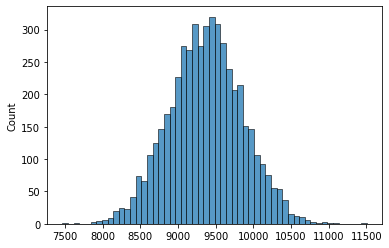

In [ ]:
collect_sample_means_male=[]
for i in range(5000):
  sample_mean=df_Male["Purchase"].sample(num_samples).mean()
  collect_sample_means_male.append(sample_mean)
sns.histplot(collect_sample_means_male)

In [ ]:
#Female 99% confidence
lower_limit=np.mean(collect_sample_means_Female)-a_99*np.std(collect_sample_means_Female)
upper_limit=np.mean(collect_sample_means_Female)+a_99*np.std(collect_sample_means_Female)
print("Lower limit, upper limit",lower_limit,upper_limit)

Lower limit, upper limit 7578.2372610641905 9760.221986935812


In [ ]:
#Male 99% confidence
lower_limit=np.mean(collect_sample_means_male)-a_99*np.std(collect_sample_means_male)
upper_limit=np.mean(collect_sample_means_male)+a_99*np.std(collect_sample_means_male)
print("Lower limit, upper limit",lower_limit,upper_limit)

Lower limit, upper limit 8232.495200003721 10505.652119996279


In [ ]:
#Female 95% confidence
lower_limit=np.mean(collect_sample_means_Female)-a_95*np.std(collect_sample_means_Female)
upper_limit=np.mean(collect_sample_means_Female)+a_95*np.std(collect_sample_means_Female)
print("Lower limit, upper limit",lower_limit,upper_limit)

Lower limit, upper limit 7750.06110125958 9588.398146740423


In [ ]:
#Male 95% confidence
lower_limit=np.mean(collect_sample_means_male)-a_95*np.std(collect_sample_means_male)
upper_limit=np.mean(collect_sample_means_male)+a_95*np.std(collect_sample_means_male)
print("Lower limit, upper limit",lower_limit,upper_limit)

Lower limit, upper limit 8411.498538903732 10326.648781096268


In [ ]:
#Female 90% confidence
lower_limit=np.mean(collect_sample_means_Female)-a_90*np.std(collect_sample_means_Female)
upper_limit=np.mean(collect_sample_means_Female)+a_90*np.std(collect_sample_means_Female)
print("Lower limit, upper limit",lower_limit,upper_limit)

Lower limit, upper limit 7897.83908298248 9440.620165017523


In [ ]:
#Male 90% confidence
lower_limit=np.mean(collect_sample_means_male)-a_90*np.std(collect_sample_means_male)
upper_limit=np.mean(collect_sample_means_male)+a_90*np.std(collect_sample_means_male)
print("Lower limit, upper limit",lower_limit,upper_limit)

Lower limit, upper limit 8565.45128559024 10172.69603440976


In [ ]:
df_Partnered=df[df["Marital_Status"]==1]
df_Single=df[df["Marital_Status"]==0]

9187.040076020861
21398 12


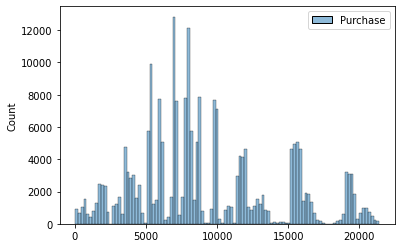

In [ ]:
sns.histplot(df_Partnered)
print(df_Partnered["Purchase"].mean())
print(df_Partnered["Purchase"].max(),df_Partnered["Purchase"].min())
#The distribution is right-skewed and does not resemblem a gaussin distribution.

9201.581848893398
21399 12


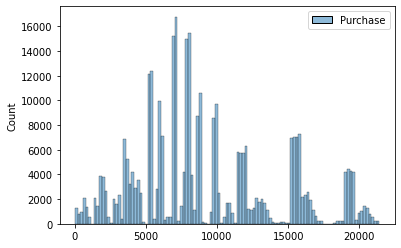

In [ ]:
sns.histplot(df_Single)
print(df_Single["Purchase"].mean())
print(df_Single["Purchase"].max(),df_Single["Purchase"].min())
#The distribution is right-skewed and does not resemblem a gaussin distribution.

5000


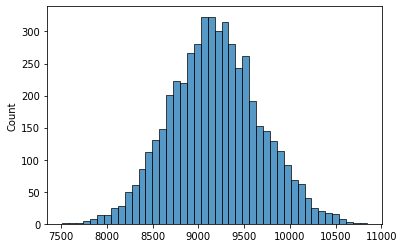

In [ ]:
collect_sample_means_Partnered=[]
for i in range(5000):
  sample_mean=df_Partnered["Purchase"].sample(num_samples).mean()
  collect_sample_means_Partnered.append(sample_mean)
sns.histplot(collect_sample_means_Partnered)
print(len(collect_sample_means_Partnered))

5000


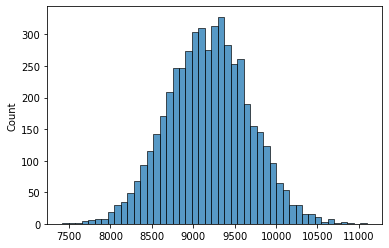

In [ ]:
collect_sample_means_Single=[]
for i in range(5000):
  sample_mean=df_Single["Purchase"].sample(num_samples).mean()
  collect_sample_means_Single.append(sample_mean)
sns.histplot(collect_sample_means_Single)
print(len(collect_sample_means_Single))

In [ ]:
#Partnered 95% confidence
lower_limit=np.mean(collect_sample_means_Partnered)-a_95*np.std(collect_sample_means_Partnered)
upper_limit=np.mean(collect_sample_means_Partnered)+a_95*np.std(collect_sample_means_Partnered)
print("Lower limit, upper limit",lower_limit,upper_limit)

Lower limit, upper limit 8216.935346444945 10149.106509555055


In [ ]:
#Single 95% confidence
lower_limit=np.mean(collect_sample_means_Single)-a_95*np.std(collect_sample_means_Single)
upper_limit=np.mean(collect_sample_means_Single)+a_95*np.std(collect_sample_means_Single)
print("Lower limit, upper limit",lower_limit,upper_limit)

Lower limit, upper limit 8215.660342417461 10152.82230558254


In [ ]:
df_0_17=df[df["Age"]=="0-17"]
df_18_25=df[df["Age"]=="18-25"]
df_26_35=df[df["Age"]=="26-35"]
df_36_50=df[df["Age"]=="36-50"]
df_51_55=df[df["Age"]=="51-55"]
df_55=df[df["Age"]=="55+"]

In [ ]:
df_36_50

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


5000


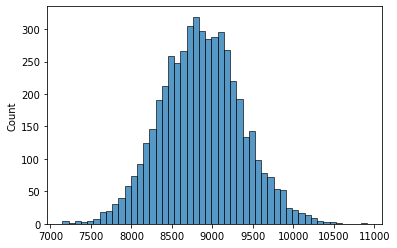

In [ ]:
collect_sample_means_0_17=[]
for i in range(5000):
  sample_mean=df_0_17["Purchase"].sample(num_samples).mean()
  collect_sample_means_0_17.append(sample_mean)
sns.histplot(collect_sample_means_0_17)
print(len(collect_sample_means_0_17))

5000


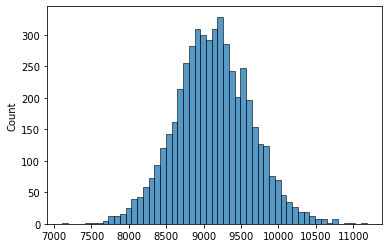

In [ ]:
collect_sample_means_18_25=[]
for i in range(5000):
  sample_mean=df_18_25["Purchase"].sample(num_samples).mean()
  collect_sample_means_18_25.append(sample_mean)
sns.histplot(collect_sample_means_18_25)
print(len(collect_sample_means_18_25))

5000


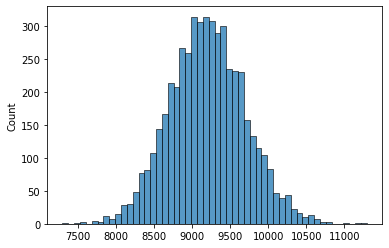

In [ ]:
collect_sample_means_26_35=[]
for i in range(5000):
  sample_mean=df_26_35["Purchase"].sample(num_samples).mean()
  collect_sample_means_26_35.append(sample_mean)
sns.histplot(collect_sample_means_26_35)
print(len(collect_sample_means_26_35))

In [ ]:
collect_sample_means_36_50=[]
try:
  for i in range(5000):
    sample_mean=df_36_50["Purchase"].sample(num_samples).mean()
    collect_sample_means_36_50.append(sample_mean)
  sns.histplot(collect_sample_means_36_50)
  print(len(collect_sample_means_36_50))
except:
  pass

5000


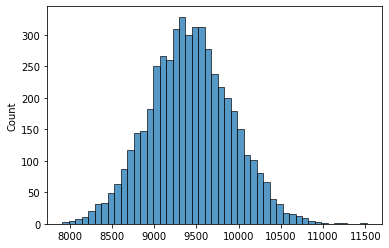

In [ ]:
collect_sample_means_51_55=[]
for i in range(5000):
  sample_mean=df_51_55["Purchase"].sample(num_samples).mean()
  collect_sample_means_51_55.append(sample_mean)
sns.histplot(collect_sample_means_51_55)
print(len(collect_sample_means_51_55))

5000


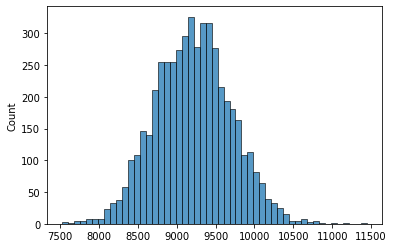

In [ ]:
collect_sample_means_55=[]
for i in range(5000):
  sample_mean=df_55["Purchase"].sample(num_samples).mean()
  collect_sample_means_55.append(sample_mean)
sns.histplot(collect_sample_means_55)
print(len(collect_sample_means_55))

In [ ]:
# upper_limit is the upper limit of confidence intervel
# lower_limit is the lower limit of confidence intervel

In [ ]:
#0-17 95% confidence
lower_limit=np.mean(collect_sample_means_0_17)-a_95*np.std(collect_sample_means_0_17)
upper_limit=np.mean(collect_sample_means_0_17)+a_95*np.std(collect_sample_means_0_17)
print("Lower limit, upper limit",lower_limit,upper_limit)

Lower limit, upper limit 7883.701406881922 9836.654673118079


In [ ]:
#18-25 95% confidence
lower_limit=np.mean(collect_sample_means_18_25)-a_95*np.std(collect_sample_means_18_25)
upper_limit=np.mean(collect_sample_means_18_25)+a_95*np.std(collect_sample_means_18_25)
print("Lower limit, upper limit",lower_limit,upper_limit)

Lower limit, upper limit 8143.932721156085 10108.036430843913


In [ ]:
#26-35 95% confidence
lower_limit=np.mean(collect_sample_means_26_35)-a_95*np.std(collect_sample_means_26_35)
upper_limit=np.mean(collect_sample_means_26_35)+a_95*np.std(collect_sample_means_26_35)
print("Lower limit, upper limit",lower_limit,upper_limit)

Lower limit, upper limit 8228.3839633396 10170.527860660402


In [ ]:
#36-50 95% confidence
lower_limit=np.mean(collect_sample_means_36_50)-a_95*np.std(collect_sample_means_36_50)
upper_limit=np.mean(collect_sample_means_36_50)+a_95*np.std(collect_sample_means_36_50)
print("Lower limit, upper limit",lower_limit,upper_limit)


Lower limit, upper limit nan nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
#51-55 95% confidence
lower_limit=np.mean(collect_sample_means_51_55)-a_95*np.std(collect_sample_means_51_55)
upper_limit=np.mean(collect_sample_means_51_55)+a_95*np.std(collect_sample_means_51_55)
print("Lower limit, upper limit",lower_limit,upper_limit)

Lower limit, upper limit 8468.768789031023 10384.87243496898


In [ ]:
#55+ 95% confidence
lower_limit=np.mean(collect_sample_means_55)-a_95*np.std(collect_sample_means_55)
upper_limit=np.mean(collect_sample_means_55)+a_95*np.std(collect_sample_means_55)
print("Lower limit, upper limit",lower_limit,upper_limit)

Lower limit,upper limit 8252.895004541382 10167.371211458618
